# Campus Recruitment with SVM and grid search
Author: Tino Merl

__Table of Contents:__
* [Motivation & Goal](#motiv_goal)
* [CRISP-DM](#crisp_dm)
* [Business Understanding](#buss_und)
* [Data Unterstanding](#dat_und)
* [Data Preparation](#dat_prep)
* [Modeling](#model)
* [Evaluation](#eval)

## Motivation & Goal<a class="anchor" id="motiv_goal"></a>
First and foremost this is a homework to deepen the understanding and usage of python's library scikit-learn. To be precise the usage of support vector machines(SVM) in scikit-learn. For this assignment the campus recruiment dataset from kaggle is used.[[1]](#kaggle_dataset) This dataset is about Placement data from students of the Jain University in Bangalore. It has various features and the information if a student got a job or not.

The goal is to use SVMs to answer the following questions tasked for the dataset.

1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?

## CRISP-DM<a class="anchor" id="crisp_dm"></a>
CRISP-DM is an acronym standing for Cross Industry Standard Process for Data Mining. I will continue to refer to it as CRISP-DM. It's a widely used process for standardization while working with data. It consists of six steps.

1. Business Understanding
2. Data Unterstanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

Although this list lines them out as sequential there is sometimes a bit of back and forth between the steps. This is better lined out by the following illustration.

<div style="margin:auto;">
    <img style="display:block; margin-left: auto; margin-right:auto;" src="img/crisp-dm_diagramm.png"/>
    <div style="text-align:center;">CRISP-DM diagram by statistik-dresden.de[<a href="#crisp-dm_diagramm">2</a>]</div>
</div>

For the sake of this homework we will be leaving out the last step since this model will not be deployed to production. Therefore it will remain as experimental and we end the process after the fifth step.

## Business Understanding<a class="anchor" id="buss_und"></a>

Since there is no real business use case we will translate the assignment and the questions listed in the first paragraph. I will list them here again and try to elaborate on each one.

### Which factor influenced a candidate in getting placed?
To find this out we will be using the vector machine and a grid search. In this step we want to find out which one of our features had the most impact on our model.

### Does percentage matters for one to get placed?
This question will hopefully be answered by the same Procedure used to answer the previous question. By looking at the features and their impact it will be made clear whether or not the percentage mattered. 

### Which degree specialization is much demanded by corporate?
To find that out we will use hot label encoding and will be hopefully find out something about this question.

## Data Understanding<a class="anchor" id="dat_und"></a>
For the step of data understanding we will will first include and look at the official kaggle documentation and the description of the columns.
* `sl_no` {integer} -- Serial Number.
* `gender` {string} -- Gender- Male='M',Female='F'.
* `ssc_p` {float} -- Secondary Education percentage - 10th Grade.
* `ssc_b` {string} -- Board of Education.
* `hsc_p` {float} -- Higher Secondary Education percentage - 12th Grade.
* `hsc_b` {string} -- Board of Education - Central/ Others.
* `hsc_s` {string} -- Specialization in Higher Secondary Education.
* `degree_p` {float} -- Degree Percentage.
* `degree_t` {string} -- Under Graduation(Degree type) - Field of degree education.
* `workex` {bool} -- Work Experience.
* `etest_p` {float} -- Employability test percentage (conducted by college).
* `specialisation` {string} -- Post Graduation(MBA) - Specialization.
* `mba_p` {float} -- MBA percentage.
* `status` {string} -- Status of placement- Placed/Not placed.
* `salary` {integer} -- Salary offered by corporate to candidates.

Since we had the first look at namings at their potential data types it is now time to load the data and check up for anomalies.

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm 

%matplotlib inline

In [3]:
np.random.seed(28)
name = "Placement_Data_Full_Class.csv"
df = pd.read_csv(os.path.join("data", name))
df.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
137,138,M,67.00,Others,63.00,Central,Commerce,72.00,Comm&Mgmt,No,56.00,Mkt&HR,60.41,Placed,225000.0
183,184,M,65.00,Central,77.00,Central,Commerce,69.00,Comm&Mgmt,No,60.00,Mkt&HR,61.82,Placed,276000.0
153,154,M,49.00,Others,59.00,Others,Science,65.00,Sci&Tech,Yes,86.00,Mkt&Fin,62.48,Placed,340000.0
164,165,F,67.16,Central,72.50,Central,Commerce,63.35,Comm&Mgmt,No,53.04,Mkt&Fin,65.52,Placed,250000.0
128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
76,77,F,66.50,Others,70.40,Central,Arts,71.93,Comm&Mgmt,No,61.00,Mkt&Fin,64.27,Placed,230000.0
24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
51,52,M,54.40,Central,61.12,Central,Commerce,56.20,Comm&Mgmt,No,67.00,Mkt&HR,62.65,Not Placed,NaN
65,66,M,54.00,Others,47.00,Others,Science,57.00,Comm&Mgmt,No,89.69,Mkt&HR,57.10,Not Placed,NaN


Checkup if the datatypes were casted correctly to note for later in data preparation.

In [4]:
for col in df.columns:
    print(f"{col} was casted as {df[col].dtypes}")

sl_no was casted as int64
gender was casted as object
ssc_p was casted as float64
ssc_b was casted as object
hsc_p was casted as float64
hsc_b was casted as object
hsc_s was casted as object
degree_p was casted as float64
degree_t was casted as object
workex was casted as object
etest_p was casted as float64
specialisation was casted as object
mba_p was casted as float64
status was casted as object
salary was casted as float64


The first abnormalities can be already seen. `workex` wasn't casted as bool and `salary` has the datatype float instead of integer. The first stems from the point that instead of using `True` and `False` the Work experience seems to be coded with Yes and No as values. `salary` wasn't casted as integer because of the NaNs. Since integer can't naturally deal with NaNs this column was therefore casted as float. This can be fixed by replacing the NaNs later on.

In [5]:
df.describe(include="all")

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


By first looking at the description of the dataframe it seems, that besides `salary` every column has every cell filled. That is really good. But we will still evaluate this finding later on. Another finding for the `salary` column is the extreme max value. The 75% quantile is 300000. The max value however is 940000. More than three times the 75% quantile. Therefore special attention should be paid to this column.
Since the columns `gender`, `ssc_b`, `hsc_b` and `status` all only consist of two different values they seem to be able to be label encoded when preparing the data for the SVM. 
The percentage columns however all look fine without any abnormalities.

Before we look at the unique values of the non-percentage values we will first look at the thesis at fill-percentage of cells with and without `salary`.

In [6]:
print("Column fill percentage with salary included:")
print(len(df.columns[df.isna().any()])/len(df.columns))
print("Column fill percentage with salary excluded:")
print(len(df.drop(columns=["salary"]).columns[df.drop(columns=["salary"]).isna().any()])/len(df.drop(columns=["salary"]).columns))
print("Cell fill percentage with salary included:")
print(df.isnull().sum().sum()/np.product(df.shape))
print("Cell fill percentage with salary excluded:")
print(df.drop(columns=["salary"]).isnull().sum().sum()/np.product(df.drop(columns=["salary"]).shape))

Column fill percentage with salary included:
0.06666666666666667
Column fill percentage with salary excluded:
0.0
Cell fill percentage with salary included:
0.020775193798449613
Cell fill percentage with salary excluded:
0.0


This proves the thesis, that except `salary` all columns and cells are perfectly filled. To find out if we can really label encode the previously matched columns we will now look at their unique values and also for the ones which are non numeric.

In [7]:
nonPerCols = [
    "gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"
    ]

for col in nonPerCols:
    print(f"{col} has the unique values: {df[col].unique()}")

gender has the unique values: ['M' 'F']
ssc_b has the unique values: ['Others' 'Central']
hsc_b has the unique values: ['Others' 'Central']
hsc_s has the unique values: ['Commerce' 'Science' 'Arts']
degree_t has the unique values: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex has the unique values: ['No' 'Yes']
specialisation has the unique values: ['Mkt&HR' 'Mkt&Fin']
status has the unique values: ['Placed' 'Not Placed']


This also proves that we can label encode the columns mentioned and also cast some of them to boolean. The next step is to check the numeric values in a similiar manner.

In [11]:
numCols = [
    "sl_no", "ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"
    ]

for col in numCols:
    print(f"{col} has the unique values:\n{np.sort(df[col].unique())}\n")

sl_no has the unique values:
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]

ssc_p has the unique values:
 [40.89 41.   43.   44.   45.   46.   47.   48.   49.   50.   51.  

As earlier assumed there are no extreme outliers despite for the salary. This means, that there is no further action needed for these columns. Lastly we will plot the occurences as histograms to get an understanding about the distribution for the several features.

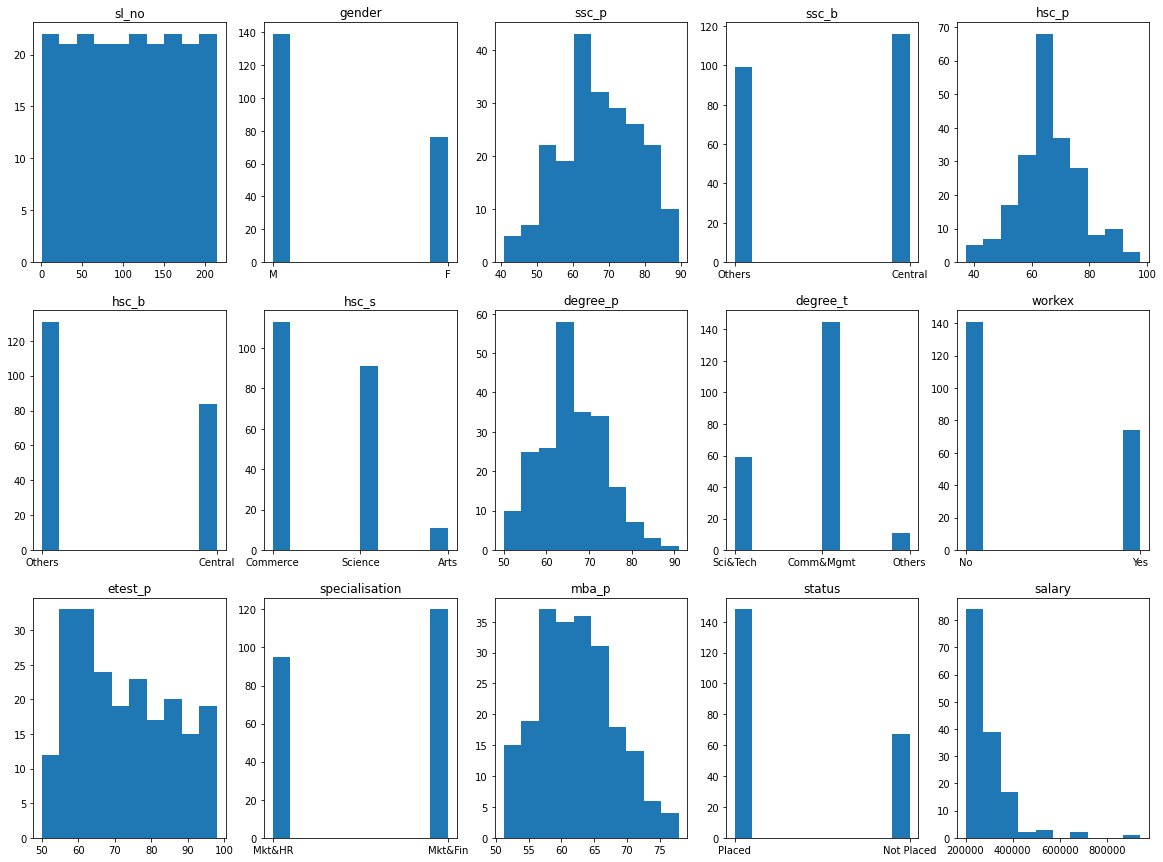

In [26]:
cols = list(df.columns)
ncols = 5
nrows = round(len(cols)/ncols)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
i = 0
j = 0

while len(cols) != 0:
    column = cols[0]
    cols.remove(column)
    ax[i, j].hist(df[column])
    ax[i, j].set_title(column)
    j += 1
    if j == ncols:
        j = 0
        i += 1
plt.draw()

The graphs above lay out some more insights to the data. The most interesting fact is, that it seems some of the serial numbers in the column `sl_no` are duplicated. We will look at this with the next code snippet. But before that we will further analyse the other graphs. The following features have overrepresentation for the named expression. Some more extreme than others.

* `gender` for `M`
* `hsc_b` for `Others`
* `degree_t` for `Comm&Mgt`
* `workex` for `No`
* `status` for `Placed`

The other distributions seem to be more or less proportional distributions which don't tend to get extreme.

But now we will the claim about the duplicate values in `sl_no`.

In [46]:
df.groupby(["sl_no"]).size().unique()

array([1])

This discards the claim for duplicate values in `sl_no`. And since the `sl_no` doesn't give any additional value to the data despite being a consecutive integer it will be dropped in the data preparation.
Therefore the data understanding is finished at this point and we will move on to the data preparation part.

## Data Preparation

__Needed Steps:__

1. Hot label encode `specialisation`
2. Update NaNs to 0.
3. Cast `workex` to bool.
4. Label encode `gender`, `ssc_b`, `hsc_b` and `status`.
5. Drop the column `sl_no`.

## Footnotes
[1]<a class="anchor" id="kaggle_dataset"></a> Ben Roshan D (2020). Campus Recruitment, Academic and Employability Factors influencing placement, Version 1. Retrieved 2020-05-10 from https://www.kaggle.com/benroshan/factors-affecting-campus-placement.

[2]<a class="anchor" id="crisp-dm_diagramm"></a> Wolf Riepel (2012). CRISP-DM: Ein Standard-Prozess-Modell für Data Mining. Retrieved 2020-05-10 from https://statistik-dresden.de/archives/1128